In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from handwritten_zipcodes import create_handwritten_zipcodes

## Short Data Exploration

In [2]:
# creating retro 'MNIST' data
train_loader, test_loader = create_handwritten_zipcodes()
print(f'samples:\t{len(train_loader.dataset) + len(test_loader.dataset)}')
print(f'samples train:\t{len(train_loader.dataset)}')
print(f'samples test:\t{len(test_loader.dataset)}')

samples:	9298
samples train:	7291
samples test:	2007


### View some random numbers

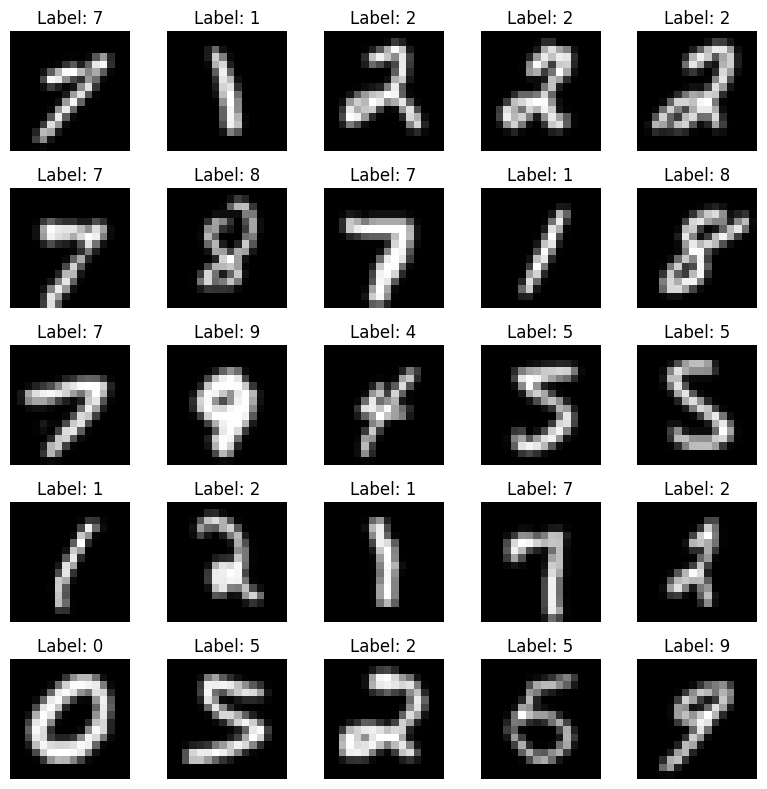

In [3]:
# plot some random images
N = 5
_, ax = plt.subplots(ncols=N,
                     nrows=N,
                     figsize=(8, 8))

# make indexing easier
ax = ax.flatten()

for i in range(N * N):
    image, label = train_loader.dataset[i]

    # 'image' is (1, 16, 16), squeeze to (16, 16)
    image = image.squeeze(0)

    ax[i].set_title(f'Label: {label}') 
    ax[i].imshow(image, cmap='grey')
    ax[i].axis('off')

plt.tight_layout()
plt.show()

### View number distribution

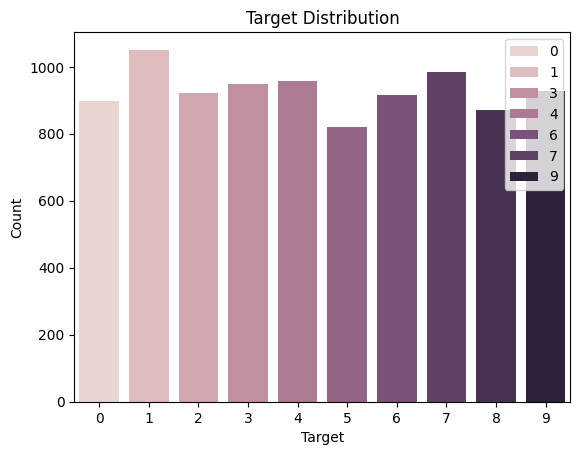

In [4]:
labels_list = []
for i, (_, label) in enumerate(train_loader.dataset + test_loader.dataset):
    labels_list.append(label)

df_labels = pd.DataFrame({'Target': labels_list})
df_labels = df_labels['Target'].value_counts().reset_index(name='Count')

plt.title('Target Distribution')
sns.barplot(
    x='Target',
    y='Count',
    data=df_labels,
    hue=list(df_labels['Target']))
plt.show()